In [39]:
import scipy.stats as st
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import entropy as kl_div, kstest

# 4. Fitting a distribution with Fitter

Fitter is a python library that utilizes the Scipy library's distribution to graph and calculate metrics for goodness of fit.

For the source code, please refer to the [github repository](https://github.com/cokelaer/fitter)

In [10]:
df = pd.read_csv('data/sample_claims.csv')

In [19]:
f = Fitter(df)
f.fit()

c:\Users\jtsw1\anaconda\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
c:\Users\jtsw1\anaconda\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
c:\Users\jtsw1\anaconda\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not conver

sumsquare_error          aic          bic  kl_div  ks_statistic  \
powerlognorm     1.293603e-08  2773.575210 -2163.592005     inf      0.049866   
exponweib        1.320917e-08  2766.823685 -2161.586045     inf      0.050528   
genpareto        1.324450e-08  2771.265235 -2165.893991     inf      0.048613   
lomax            1.335057e-08  2770.057105 -2165.128198     inf      0.047501   
johnsonsb        1.359336e-08  2766.057875 -2158.833761     inf      0.048376   

              ks_pvalue  
powerlognorm   0.961152  
exponweib      0.956632  
genpareto      0.968860  
lomax          0.974805  
johnsonsb      0.970194

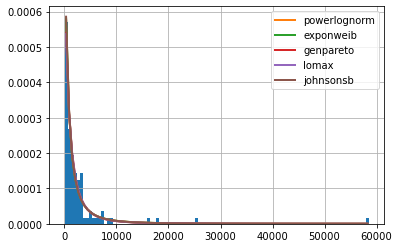

In [20]:
f.summary()

sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon     8.627424e-08  3575.446841 -1990.559271     inf       0.18499   

       ks_pvalue  
expon   0.002388

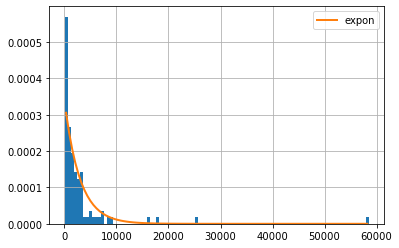

In [21]:
# Fitting with an exponential
f = Fitter(df, distributions=["expon"])
f.fit()
f.summary()

In [30]:
y, x = np.histogram(df, bins=100, density=True)
x = [(this + x[i + 1]) / 2.0 for i, this in enumerate(x[0:-1])]

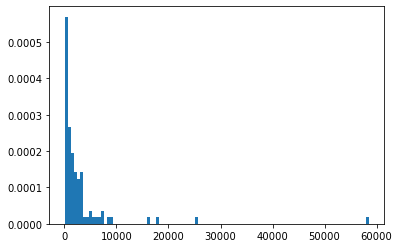

In [32]:

hist = pylab.hist(df, bins=100, density=True)

params = st.expon.fit(df)

fitted_pdf = st.expon.pdf(x, *params)

### Evaluating the goodness of fit

There are a few ways to evaluate goodness of fit. The fitter package provides:
- SSE
- AIC/BIC

Sum of square errors is a measure of quadratic loss, and is a commonly used metric.

$ SSE = \Sigma (x_{pred} - x_{actual})^2$

In [35]:
# L2 errors
sq_error = pylab.sum((fitted_pdf - y) ** 2)

Information criterion are basically penalized log likelihoods.

In [37]:
# calculate information criteria
logLik = np.sum(st.expon.logpdf(x, *params))
k = len(params)
n = len(df)
aic = 2 * k - 2 * logLik
bic = n * np.log(sq_error / n) + k * np.log(n)

In [41]:
# calculate kullback leibler divergence
kullback_leibler = kl_div(fitted_pdf, y)

# calculate goodness-of-fit statistic
dist_fitted = st.expon(*params)
ks_stat, ks_pval = kstest(df, dist_fitted.cdf)

In [28]:
log_likelihood = np.sum(np.log(st.norm.pdf(df, loc, scale)))

In [31]:
-2*log_likelihood + 2*2

1971.346878750647